In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel("GAIA IA v.1.3.xlsx")

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  230 non-null    object 
 1   Al2O3       230 non-null    float64
 2   Fe2O3       230 non-null    float64
 3   >63mm       230 non-null    float64
 4   >45mm       230 non-null    float64
 5   CS-C        230 non-null    float64
 6   RMS         230 non-null    float64
 7   A.A.        230 non-null    float64
 8   Carbono     230 non-null    float64
 9   L           230 non-null    float64
 10  a           230 non-null    float64
 11  %           230 non-null    float64
 12  Al2O3.1     230 non-null    float64
 13  Fe2O3.1     230 non-null    float64
 14  >63mm.1     230 non-null    float64
 15  >45mm.1     230 non-null    float64
 16  CS-C.1      230 non-null    float64
 17  RMS.1       230 non-null    float64
 18  A.A..1      230 non-null    float64
 19  Carbono.1   230 non-null    f

,Unnamed: 0,Al2O3,Fe2O3,>63mm,>45mm,CS-C,RMS,A.A.,Carbono,L,...,RMS.4,A.A..4,Carbono.4,L.4,a.4,%.4,Al2O3.5,Fe2O3.5,CS-C.5,Carbono.5
0,Exemplo 1,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,...,0.0,0.0,0.0,0.0,0.0,0.0,27.810569,1.580725,6.599695,0.159
1,Exemplo 2,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,...,0.0,0.0,0.0,0.0,0.0,0.0,27.353098,1.647900,6.291125,0.199
2,Exemplo 3,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,...,0.0,0.0,0.0,0.0,0.0,0.0,28.319949,1.383210,5.647089,0.161
3,Exemplo 4,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,...,0.0,0.0,0.0,0.0,0.0,0.0,29.190006,1.680295,6.368125,0.184
4,Exemplo 5,31.438879,3.924828,5.5,6.6,50.420230,10.181819,1.759454,0.131,68.90,...,0.0,0.0,0.0,0.0,0.0,0.0,28.892714,1.730287,6.416516,0.204


In [2]:
data = data.drop(data.columns[0], axis=1)


In [3]:
mapping = {0: 'Al2O3', 1: 'Fe2O3', 2: '>63mm', 3: '>45mm', 4:'CS-C', 5: 'RMS', 6: 'A.A.', 7: 'Carbono', 8: 'L', 9: 'a', 10: '%'}
for i in range(11):
    data.rename(columns={data.columns[i]: mapping[i]+'.0'}, inplace=True)
data.head()
total_features = len(data.columns) - 4
print("Total number of features: ", total_features)

Total number of features:  55


In [4]:
data.head()

,Al2O3.0,Fe2O3.0,>63mm.0,>45mm.0,CS-C.0,RMS.0,A.A..0,Carbono.0,L.0,a.0,...,RMS.4,A.A..4,Carbono.4,L.4,a.4,%.4,Al2O3.5,Fe2O3.5,CS-C.5,Carbono.5
0,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,5.18,...,0.0,0.0,0.0,0.0,0.0,0.0,27.810569,1.580725,6.599695,0.159
1,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,5.18,...,0.0,0.0,0.0,0.0,0.0,0.0,27.353098,1.647900,6.291125,0.199
2,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,5.18,...,0.0,0.0,0.0,0.0,0.0,0.0,28.319949,1.383210,5.647089,0.161
3,33.196967,2.647673,5.7,6.2,47.754574,11.969930,2.954063,1.390,74.92,5.18,...,0.0,0.0,0.0,0.0,0.0,0.0,29.190006,1.680295,6.368125,0.184
4,31.438879,3.924828,5.5,6.6,50.420230,10.181819,1.759454,0.131,68.90,10.71,...,0.0,0.0,0.0,0.0,0.0,0.0,28.892714,1.730287,6.416516,0.204


In [5]:
def plot_graph(columns, colors, legend_labels):
    for col in columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

    plt.figure(figsize=(12, 6))

    for i, col in enumerate(columns):
        plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])    

    plt.xlabel("Index")
    plt.ylabel(columns[0][:-2])
    plt.title(f"% of {columns[0][:-2]} of the Raw Materials")
    plt.legend()
    plt.grid(True)

    plt.show()

In [6]:
def plot_box(columns, legend_labels):
    fig, axs = plt.subplots(2, 4, figsize=(12, 8))

    for i, col in enumerate(columns):
        row = i // 4
        col_index = i % 4
        axs[row, col_index].boxplot(data[col].dropna())
        axs[row, col_index].set_title(legend_labels[i])    
    plt.suptitle(f"% of {columns[0][:-2]} of the Raw Materials", fontsize=16)
    for j in range(i + 1, 8):
        row = j // 4
        col_index = j % 4
        fig.delaxes(axs[row, col_index])

    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()


In [7]:
def plot_histo(columns, colors, legend_labels):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns):
        plt.hist(data[col].dropna(), bins=20, alpha=0.5, color=colors[i], label=legend_labels[i])
    plt.xlabel(f"% of {columns[0][:-2]}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of % of {columns[0][:-2]} of the Raw Materials")
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
def statistics(columns):
    statistics = data[columns].describe().T[['mean', 'std', 'min', 'max']]
    statistics['range'] = statistics['max'] - statistics['min']
    statistics['cv'] = statistics['std'] / statistics['mean'] * 100
    print("\nstatistics:")
    print(statistics)

In [9]:
def zeros(columns):
    zero_counts = (data[columns] == 0).sum()
    print("\nNumber of zero values in each column:")
    print(zero_counts)


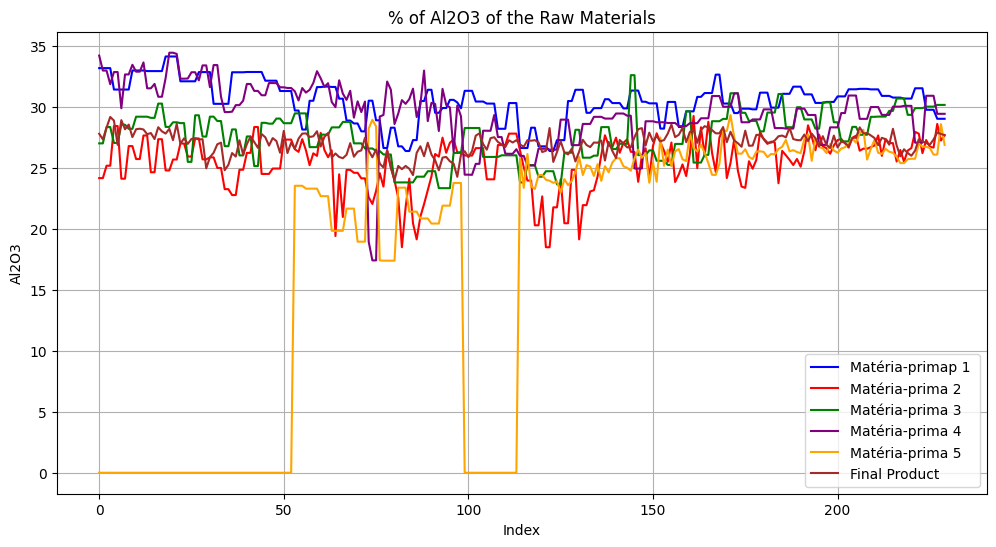

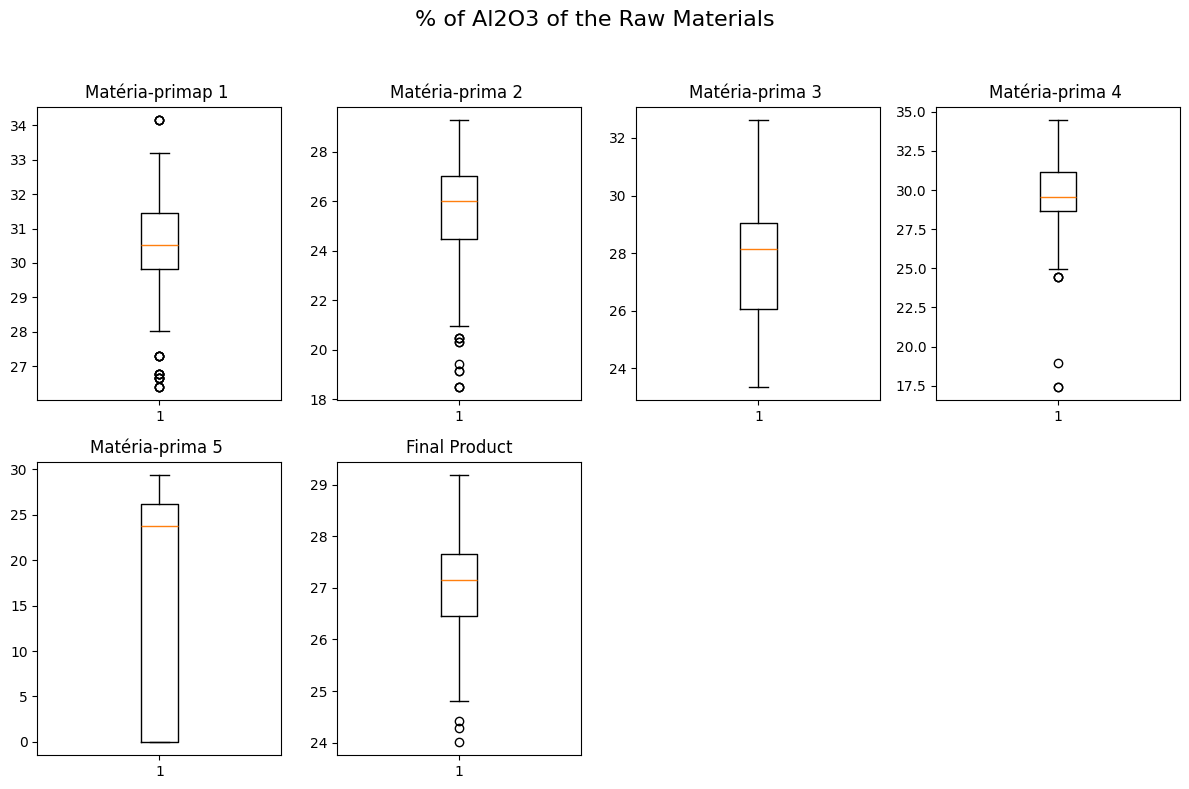

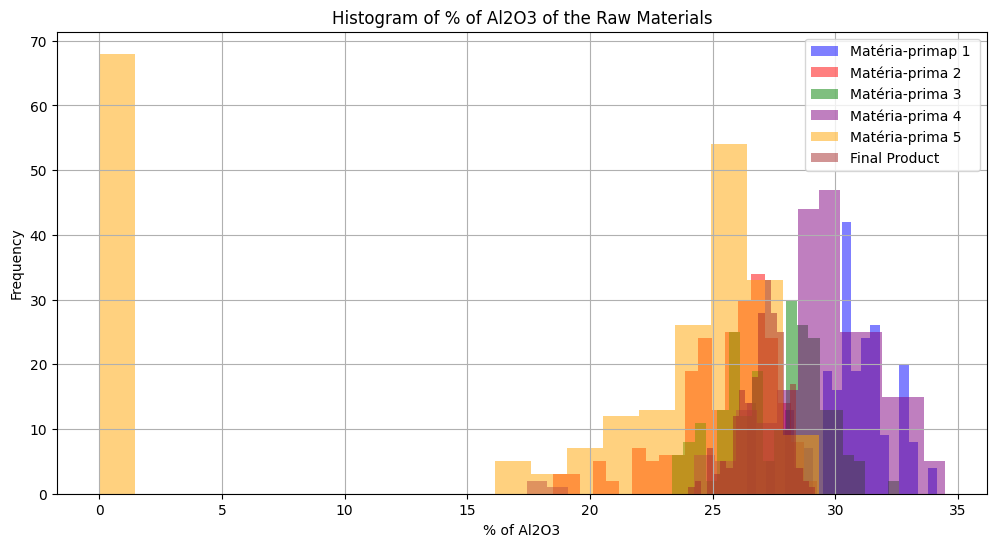


statistics:
              mean        std        min        max      range         cv
Al2O3.0  30.519007   1.711677  26.395477  34.152534   7.757057   5.608560
Al2O3.1  25.494111   2.099789  18.503185  29.274142  10.770957   8.236368
Al2O3.2  27.592513   1.973978  23.347503  32.618464   9.270961   7.154036
Al2O3.3  29.559997   2.502522  17.420978  34.460549  17.039572   8.465907
Al2O3.4  17.425835  11.517445   0.000000  29.339375  29.339375  66.094077
Al2O3.5  27.030985   0.921116  24.011236  29.190006   5.178770   3.407629

Number of zero values in each column:
Al2O3.0     0
Al2O3.1     0
Al2O3.2     0
Al2O3.3     0
Al2O3.4    68
Al2O3.5     0
dtype: int64


In [10]:
columns = [
    "Al2O3.0",
    "Al2O3.1",
    "Al2O3.2",
    "Al2O3.3",
    "Al2O3.4",
    "Al2O3.5",
]

legend_labels = [
    "Matéria-primap 1 ",
    "Matéria-prima 2 ",
    "Matéria-prima 3 ",
    "Matéria-prima 4 ",
    "Matéria-prima 5 ",
    "Final Product"
]
colors = ["blue", "red", "green", "purple", "orange", "brown", "pink", "yellow"]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

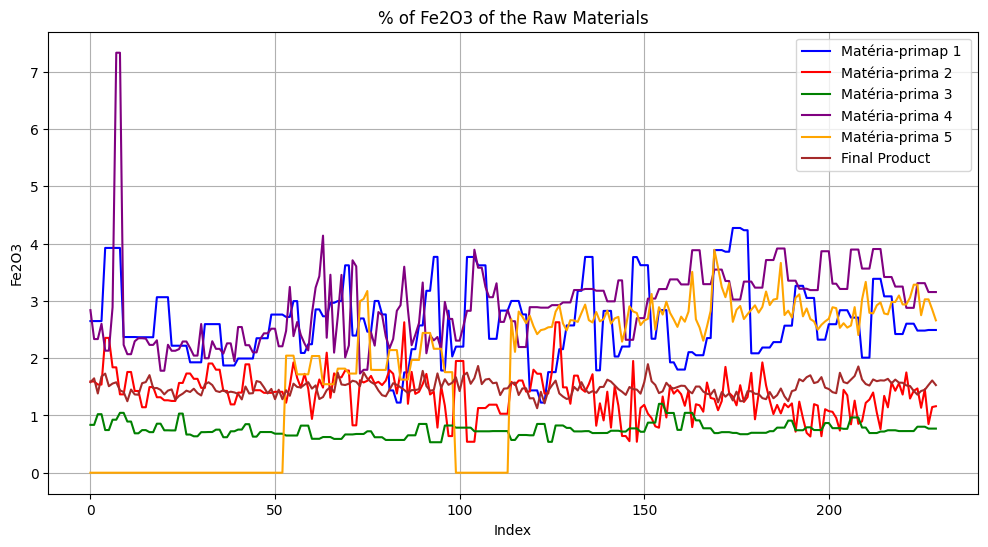

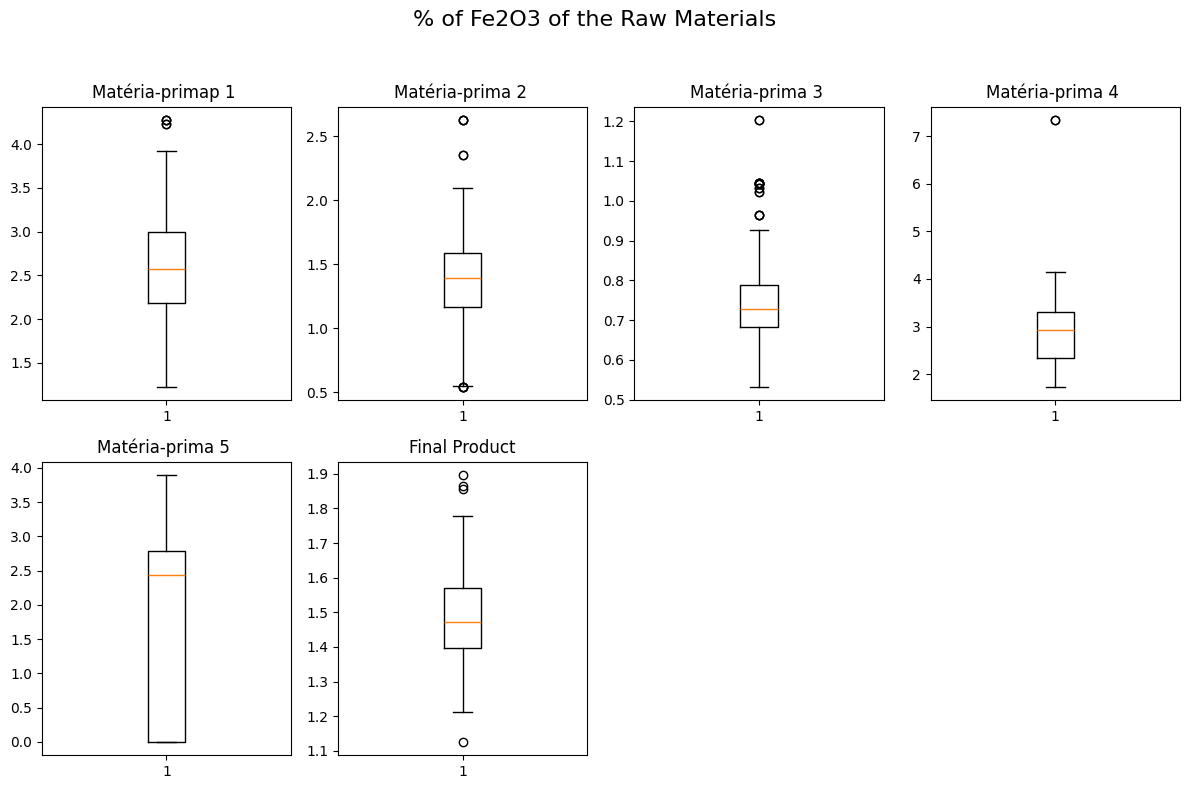

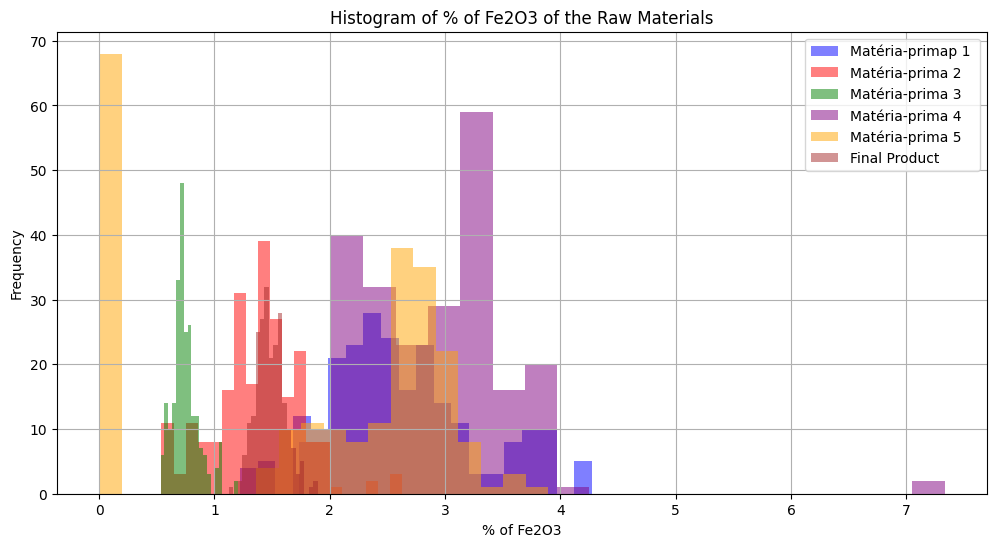


statistics:
             mean       std       min       max     range         cv
Fe2O3.0  2.626159  0.664616  1.224375  4.272979  3.048604  25.307516
Fe2O3.1  1.370403  0.374562  0.540364  2.627094  2.086730  27.332235
Fe2O3.2  0.748905  0.118354  0.532223  1.202744  0.670521  15.803655
Fe2O3.3  2.916293  0.704086  1.731353  7.333009  5.601657  24.143204
Fe2O3.4  1.806781  1.241915  0.000000  3.892706  3.892706  68.736328
Fe2O3.5  1.483993  0.126133  1.125854  1.895792  0.769938   8.499584

Number of zero values in each column:
Fe2O3.0     0
Fe2O3.1     0
Fe2O3.2     0
Fe2O3.3     0
Fe2O3.4    68
Fe2O3.5     0
dtype: int64


In [11]:
columns = [
    "Fe2O3.0",
    "Fe2O3.1",
    "Fe2O3.2",
    "Fe2O3.3",
    "Fe2O3.4",
    "Fe2O3.5",
        
]
plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

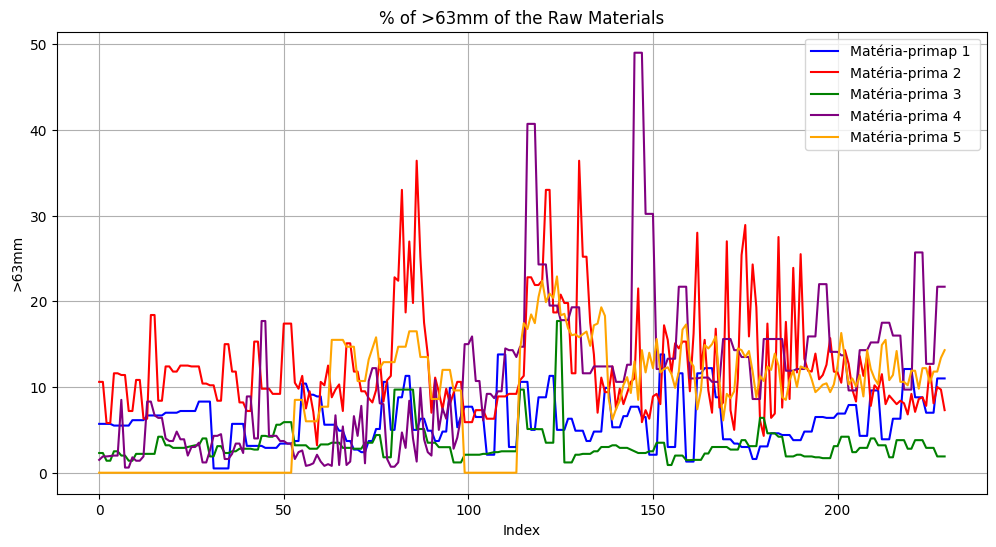

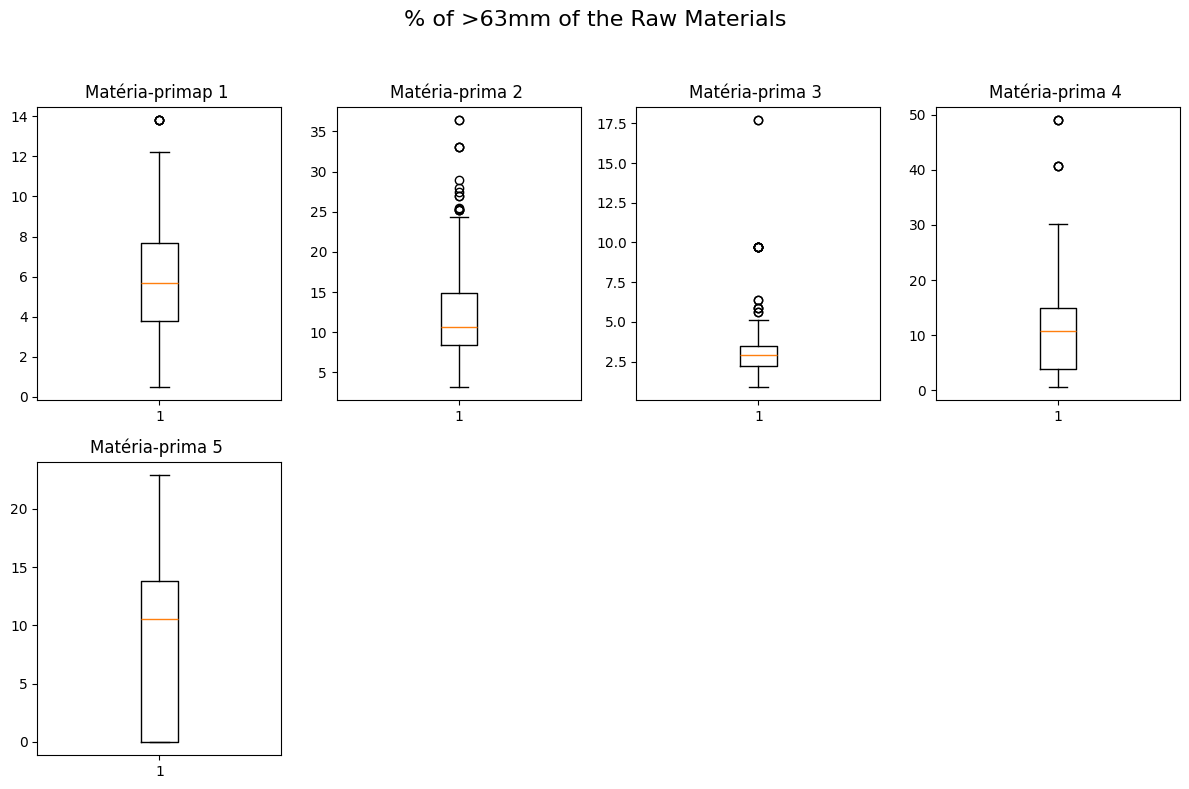

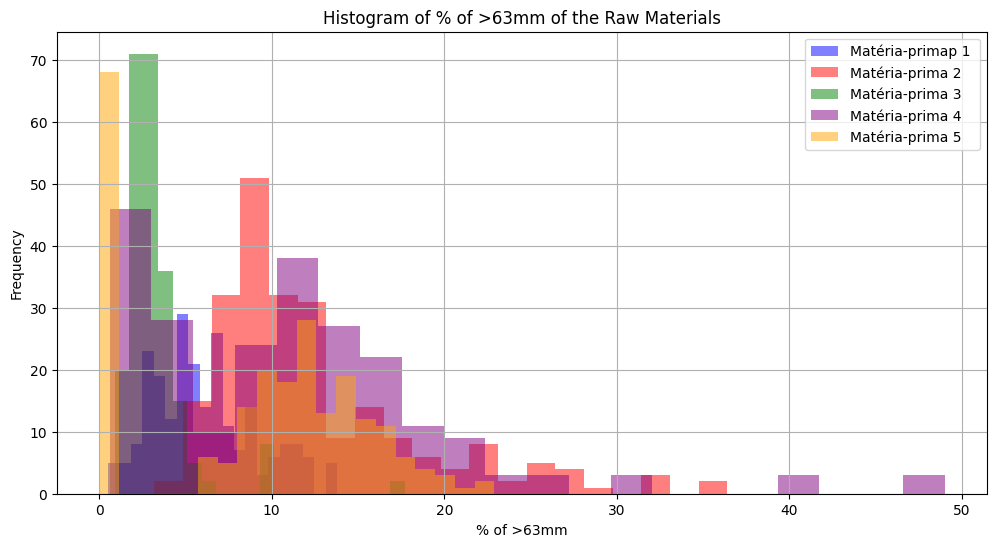


statistics:
              mean       std  min   max  range         cv
>63mm.0   6.117739  2.988625  0.5  13.8   13.3  48.851789
>63mm.1  12.470717  6.111985  3.2  36.4   33.2  49.010697
>63mm.2   3.286957  2.110426  0.9  17.7   16.8  64.206071
>63mm.3  11.081522  8.737445  0.6  49.0   48.4  78.846977
>63mm.4   8.883913  6.448967  0.0  22.9   22.9  72.591518

Number of zero values in each column:
>63mm.0     0
>63mm.1     0
>63mm.2     0
>63mm.3     0
>63mm.4    68
dtype: int64


In [12]:
columns = [
    ">63mm.0",
    ">63mm.1",
    ">63mm.2",
    ">63mm.3",
    ">63mm.4",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)


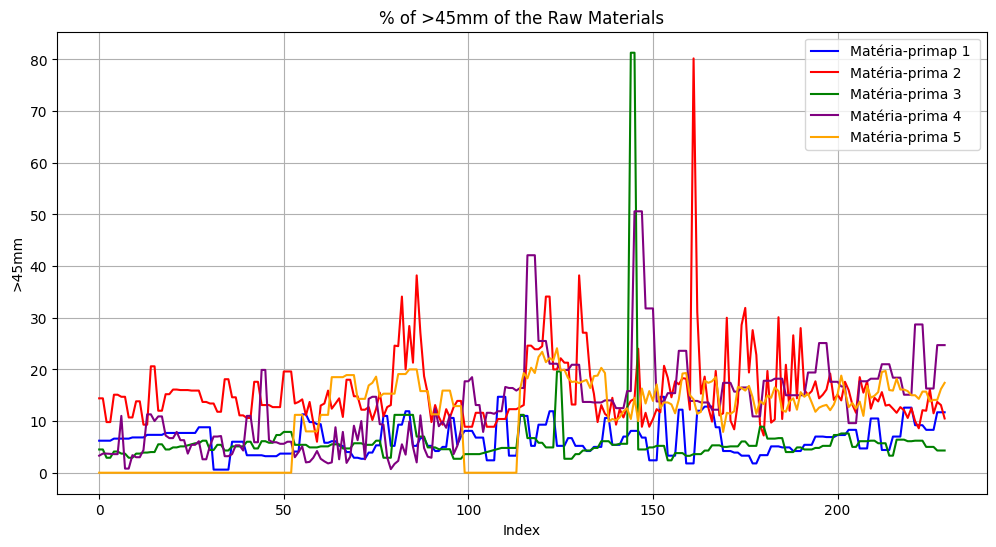

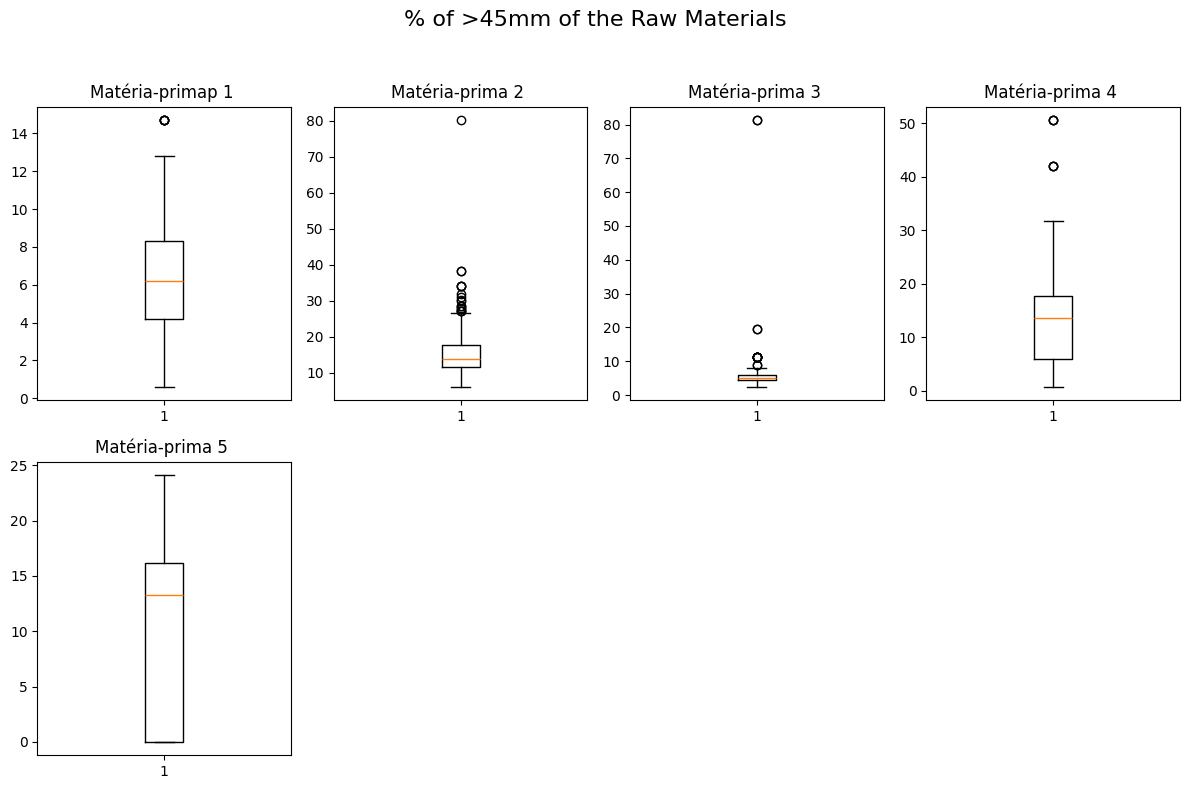

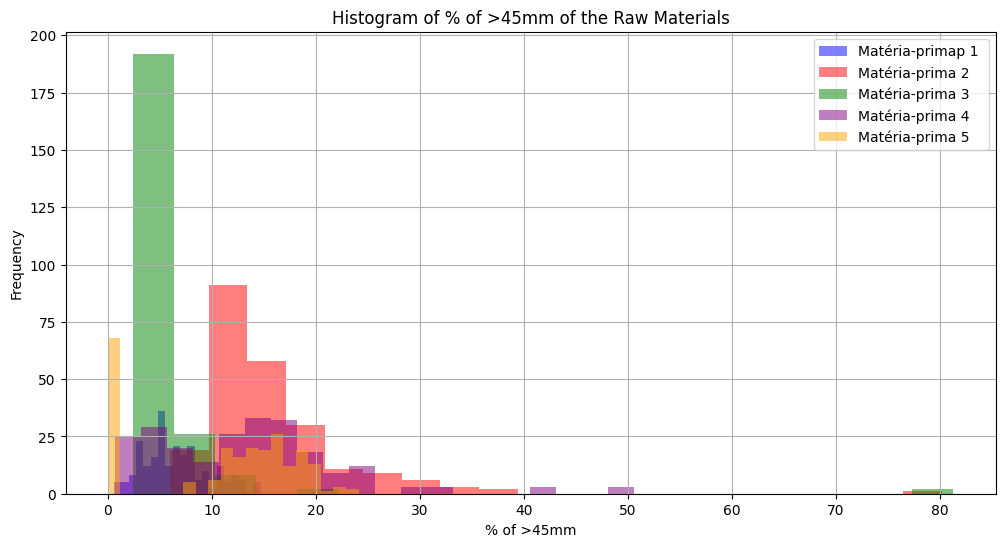


statistics:
              mean       std  min   max  range          cv
>45mm.0   6.569435  3.111798  0.6  14.7   14.1   47.367825
>45mm.1  15.657217  7.190394  6.0  80.2   74.2   45.923831
>45mm.2   6.044870  7.371986  2.4  81.3   78.9  121.954433
>45mm.3  13.257087  8.902328  0.7  50.6   49.9   67.151462
>45mm.4  10.749043  7.507962  0.0  24.1   24.1   69.847721

Number of zero values in each column:
>45mm.0     0
>45mm.1     0
>45mm.2     0
>45mm.3     0
>45mm.4    68
dtype: int64


In [13]:
columns = [
    ">45mm.0",
    ">45mm.1",
    ">45mm.2",
    ">45mm.3",
    ">45mm.4",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

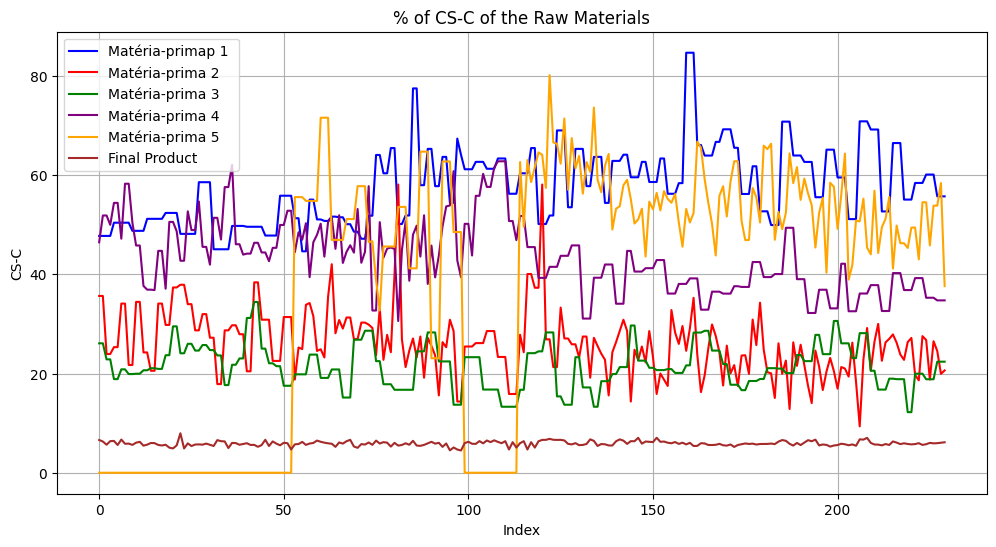

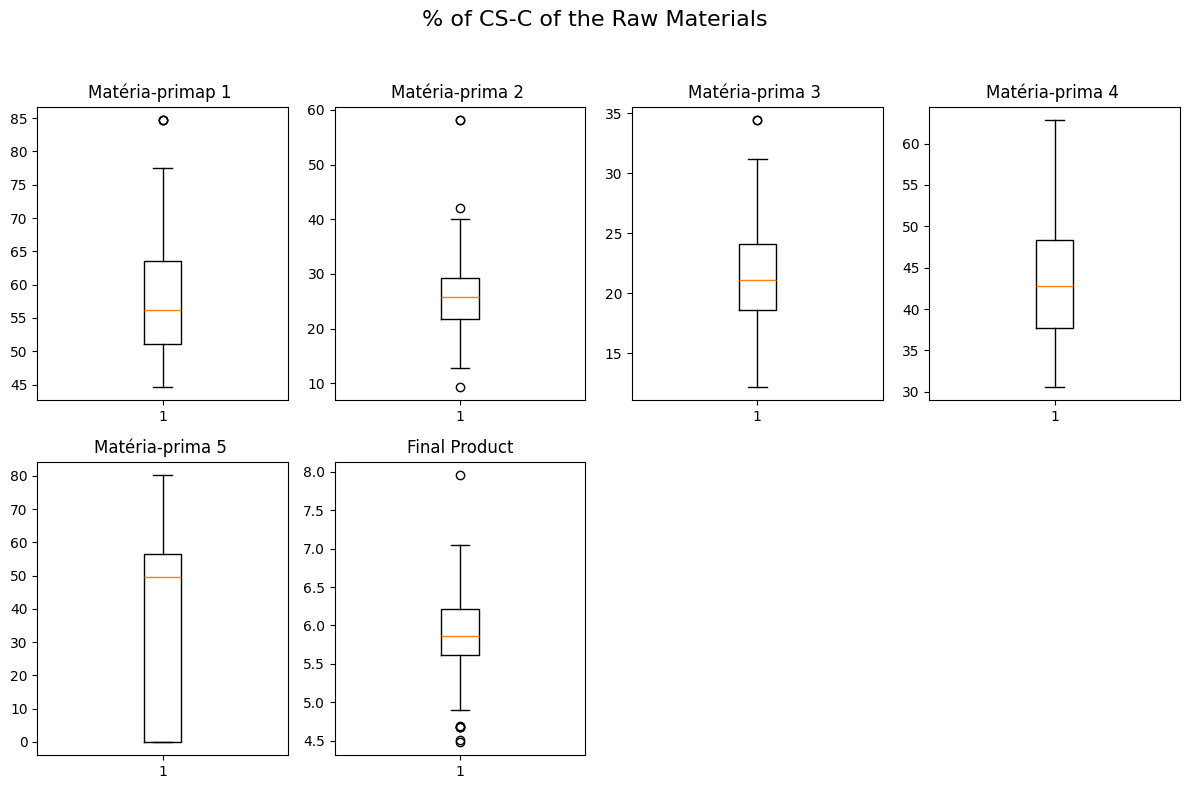

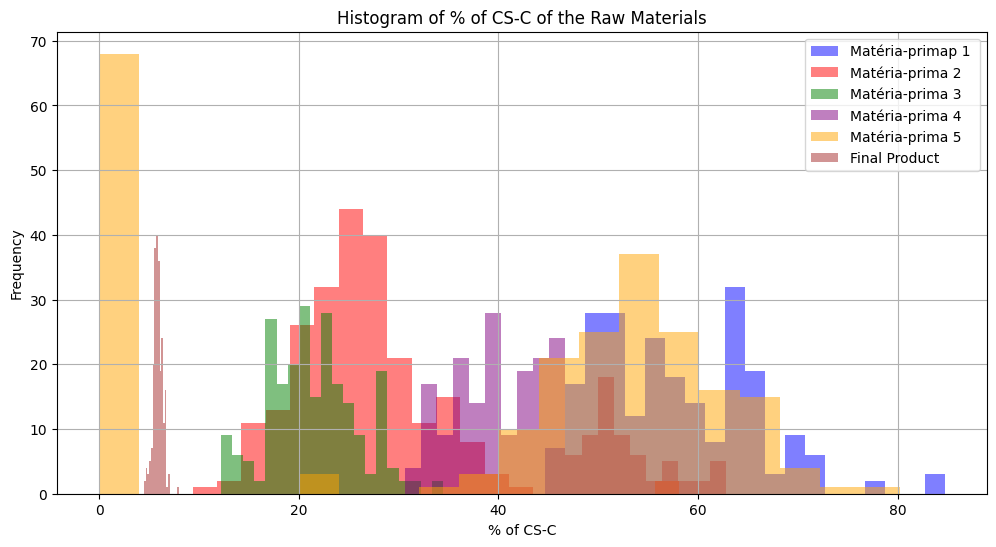


statistics:
             mean        std        min        max      range         cv
CS-C.0  57.656661   7.760067  44.646730  84.697732  40.051002  13.459100
CS-C.1  26.103246   6.573141   9.351205  58.118738  48.767533  25.181317
CS-C.2  21.539839   4.393091  12.211645  34.436012  22.224367  20.395189
CS-C.3  43.372475   7.309546  30.590823  62.827001  32.236178  16.852959
CS-C.4  37.977016  25.788790   0.000000  80.186353  80.186353  67.906309
CS-C.5   5.889014   0.484940   4.486154   7.953755   3.467601   8.234659

Number of zero values in each column:
CS-C.0     0
CS-C.1     0
CS-C.2     0
CS-C.3     0
CS-C.4    68
CS-C.5     0
dtype: int64


In [14]:
columns = [
    "CS-C.0",
    "CS-C.1",
    "CS-C.2",
    "CS-C.3",
    "CS-C.4",
    "CS-C.5",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

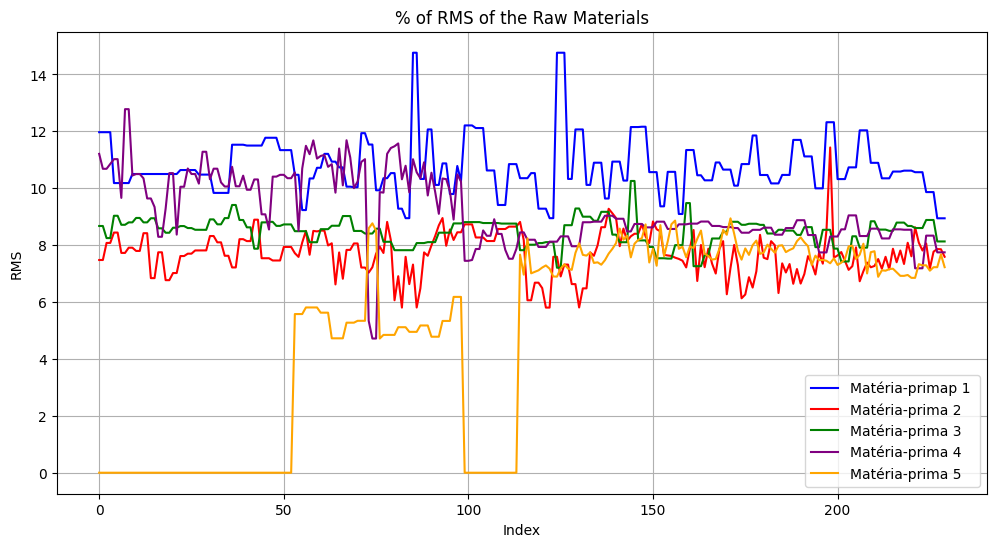

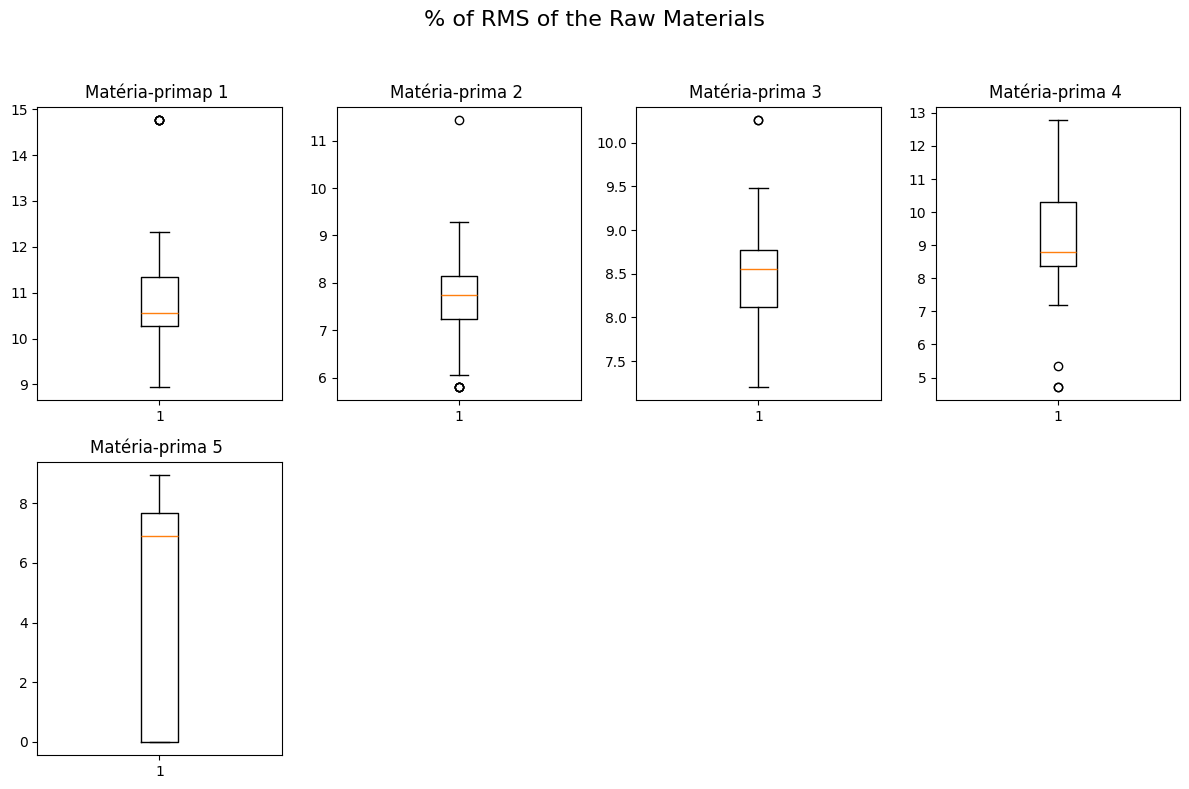

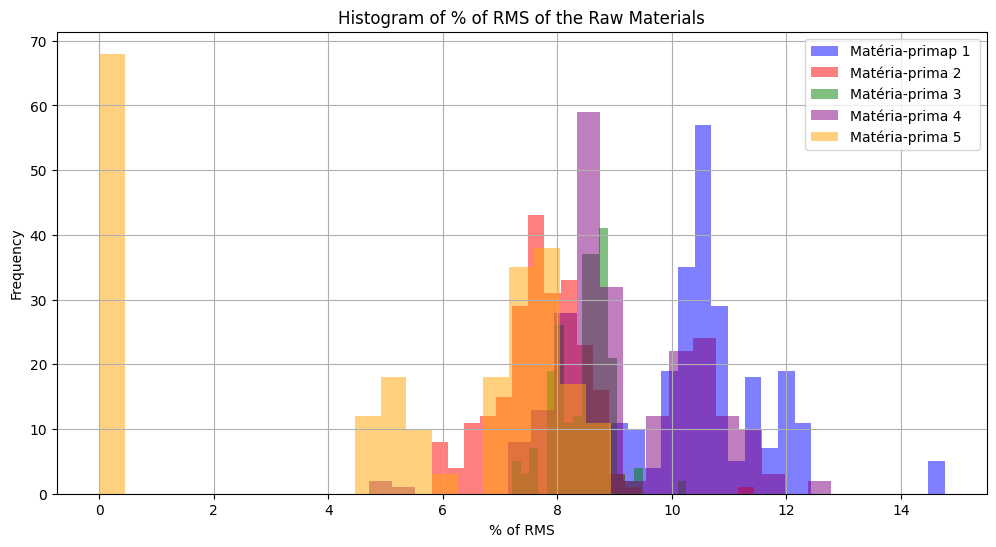


statistics:
            mean       std       min        max     range         cv
RMS.0  10.764330  1.007419  8.943260  14.763430  5.820170   9.358863
RMS.1   7.696537  0.755589  5.804632  11.433213  5.628581   9.817259
RMS.2   8.477673  0.478193  7.205862  10.255675  3.049813   5.640621
RMS.3   9.196759  1.254458  4.717141  12.779867  8.062726  13.640221
RMS.4   4.960092  3.368356  0.000000   8.941636  8.941636  67.909144

Number of zero values in each column:
RMS.0     0
RMS.1     0
RMS.2     0
RMS.3     0
RMS.4    68
dtype: int64


In [15]:
columns = [
    "RMS.0",
    "RMS.1",
    "RMS.2",
    "RMS.3",
    "RMS.4",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

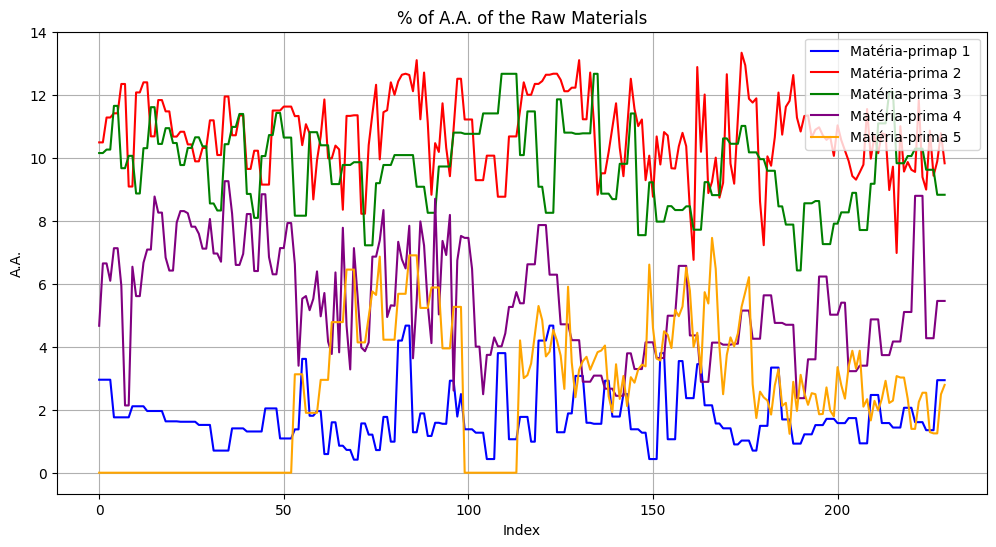

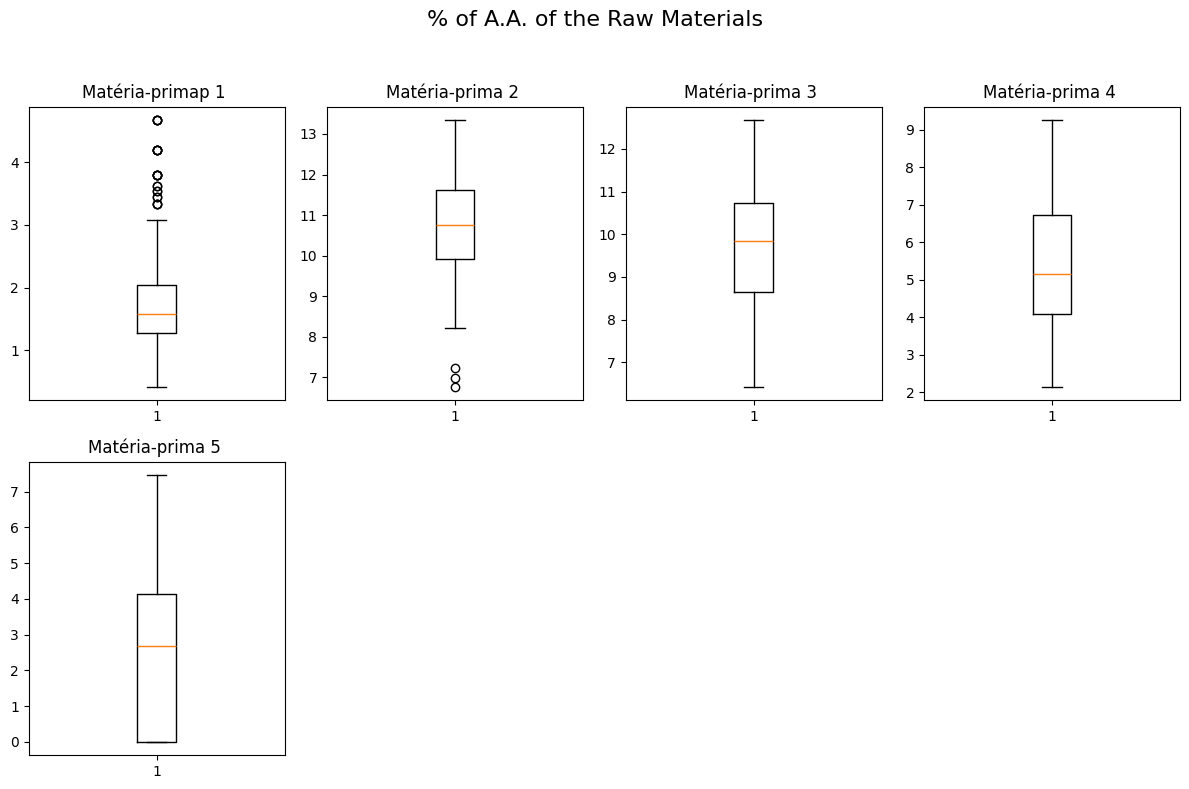

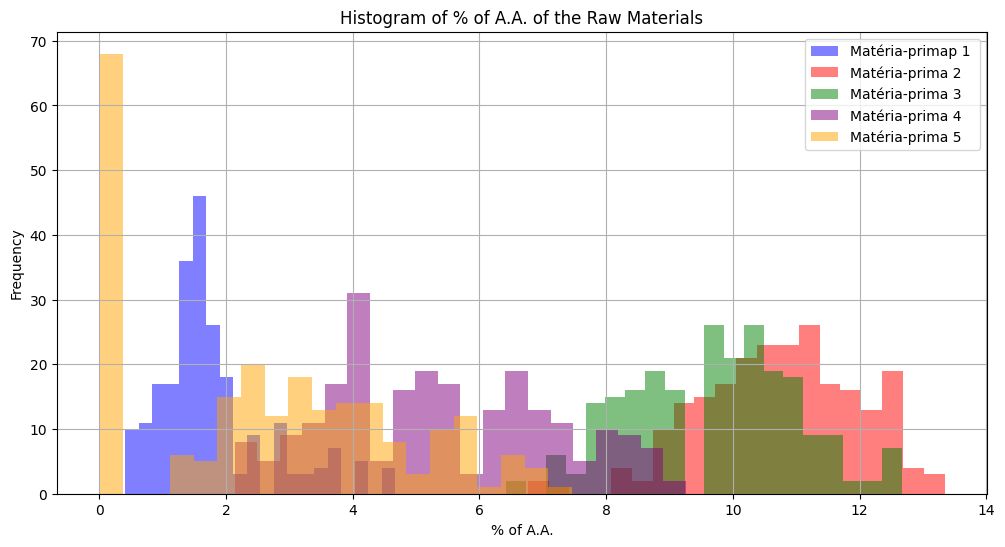


statistics:
             mean       std       min        max     range         cv
A.A..0   1.789510  0.916405  0.415191   4.672651  4.257460  51.209803
A.A..1  10.757222  1.234410  6.761373  13.340319  6.578945  11.475174
A.A..2   9.727114  1.318722  6.425399  12.670923  6.245523  13.557173
A.A..3   5.403803  1.762172  2.137013   9.259829  7.122816  32.609857
A.A..4   2.614988  2.097654  0.000000   7.458765  7.458765  80.216587

Number of zero values in each column:
A.A..0     0
A.A..1     0
A.A..2     0
A.A..3     0
A.A..4    68
dtype: int64


In [16]:
columns = [
    "A.A..0",
    "A.A..1",
    "A.A..2",
    "A.A..3",
    "A.A..4",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

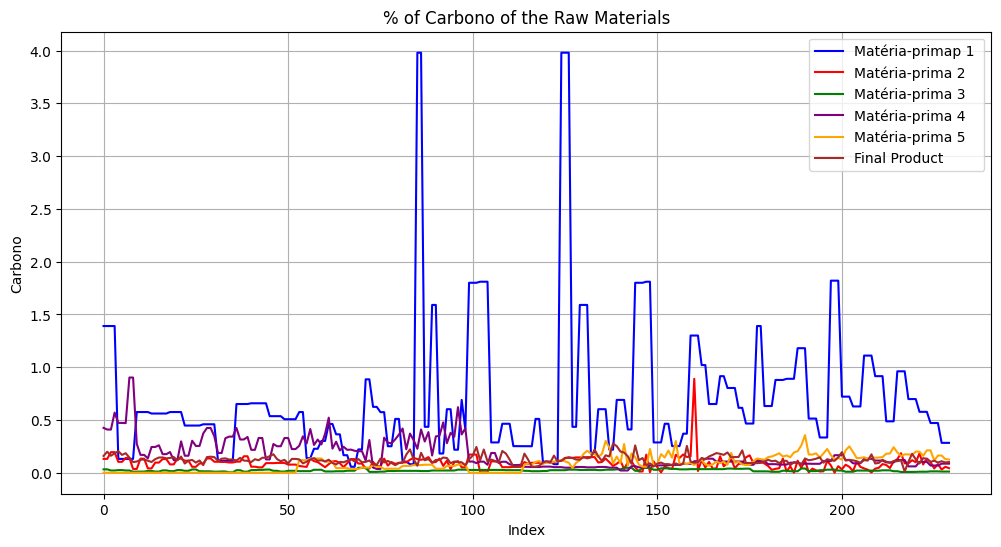

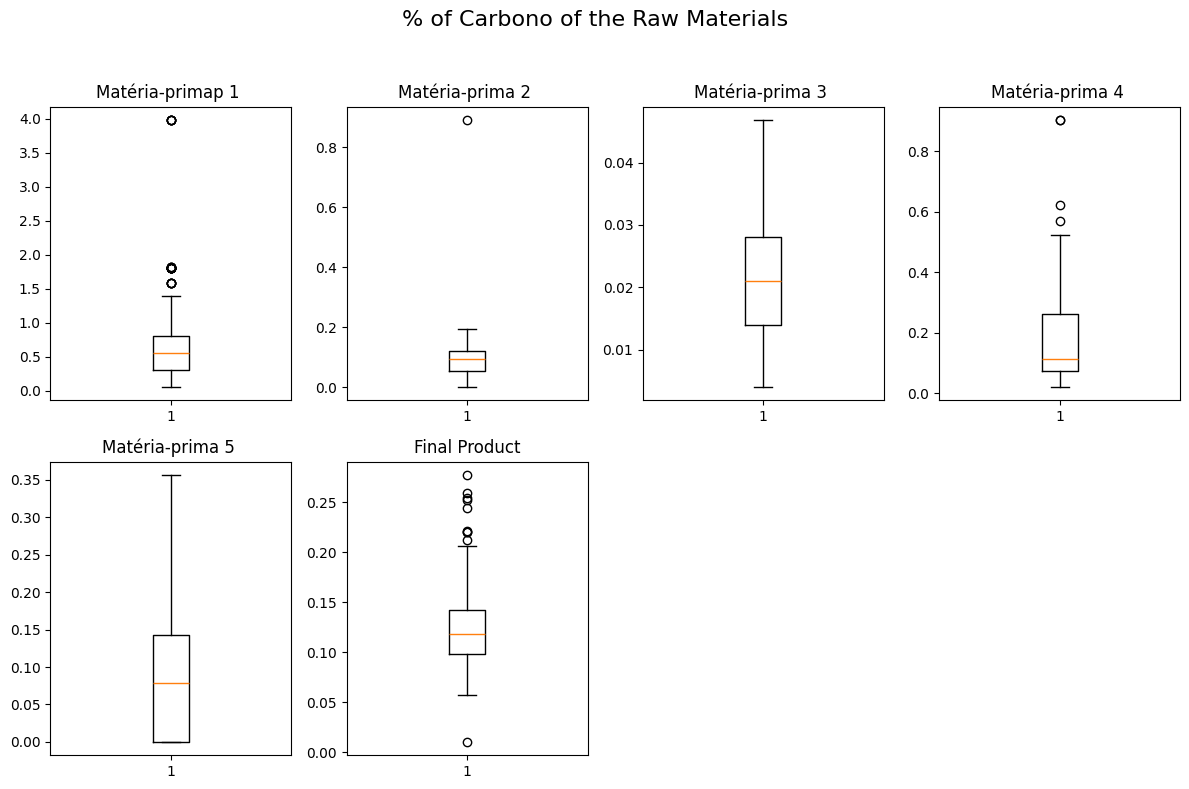

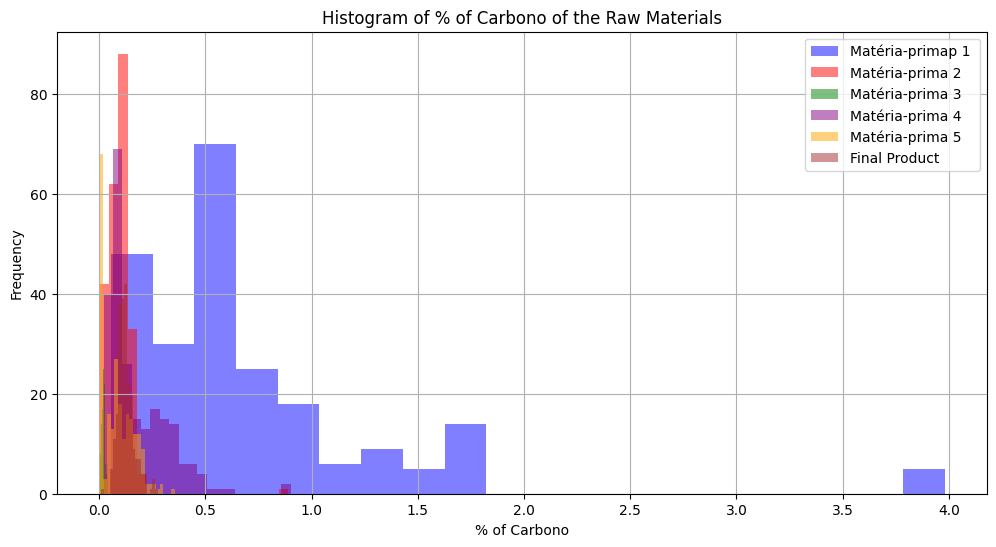


statistics:
               mean       std       min     max     range         cv
Carbono.0  0.707921  0.662165  0.056200  3.9800  3.923800  93.536646
Carbono.1  0.092630  0.068465  0.000206  0.8900  0.889794  73.912192
Carbono.2  0.021934  0.009839  0.004000  0.0468  0.042800  44.857985
Carbono.3  0.178793  0.142974  0.021100  0.9020  0.880900  79.966279
Carbono.4  0.086644  0.076443  0.000000  0.3560  0.356000  88.226170
Carbono.5  0.124310  0.039589  0.010200  0.2770  0.266800  31.846883

Number of zero values in each column:
Carbono.0     0
Carbono.1     0
Carbono.2     0
Carbono.3     0
Carbono.4    68
Carbono.5     0
dtype: int64


In [17]:
columns = [
    "Carbono.0",
    "Carbono.1",
    "Carbono.2",
    "Carbono.3",
    "Carbono.4",
    "Carbono.5",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

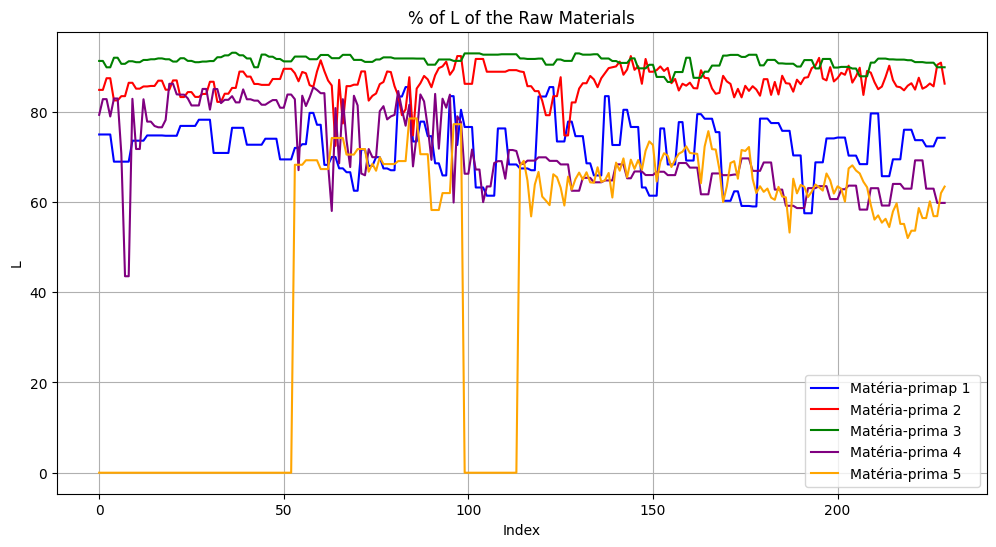

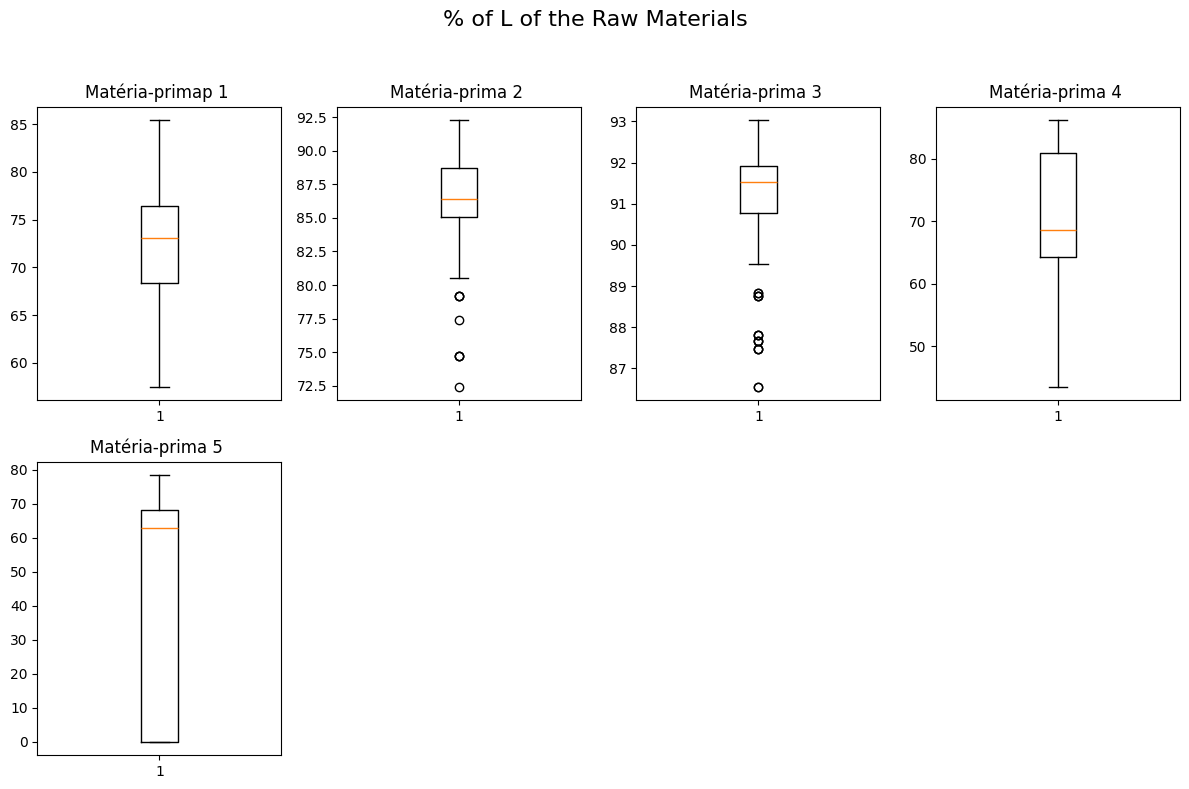

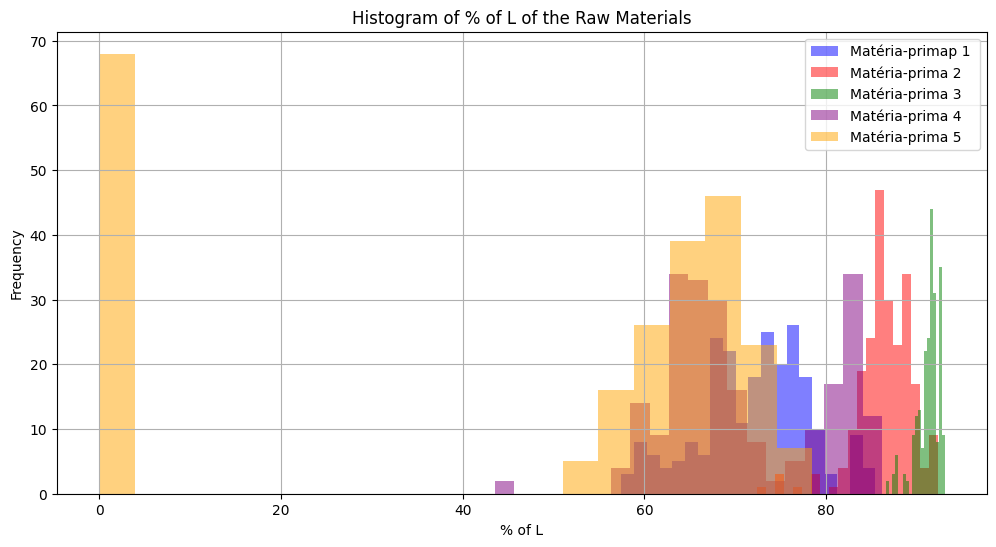


statistics:
          mean        std    min    max  range         cv
L.0  72.163493   6.034784  57.47  85.42  27.95   8.362656
L.1  86.417312   3.021424  72.40  92.29  19.89   3.496318
L.2  91.209884   1.263497  86.55  93.03   6.48   1.385263
L.3  70.922678   8.777686  43.52  86.15  42.63  12.376416
L.4  46.269130  30.412272   0.00  78.47  78.47  65.729076

Number of zero values in each column:
L.0     0
L.1     0
L.2     0
L.3     0
L.4    68
dtype: int64


In [18]:
columns = [
    "L.0",
    "L.1",
    "L.2",
    "L.3",
    "L.4",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

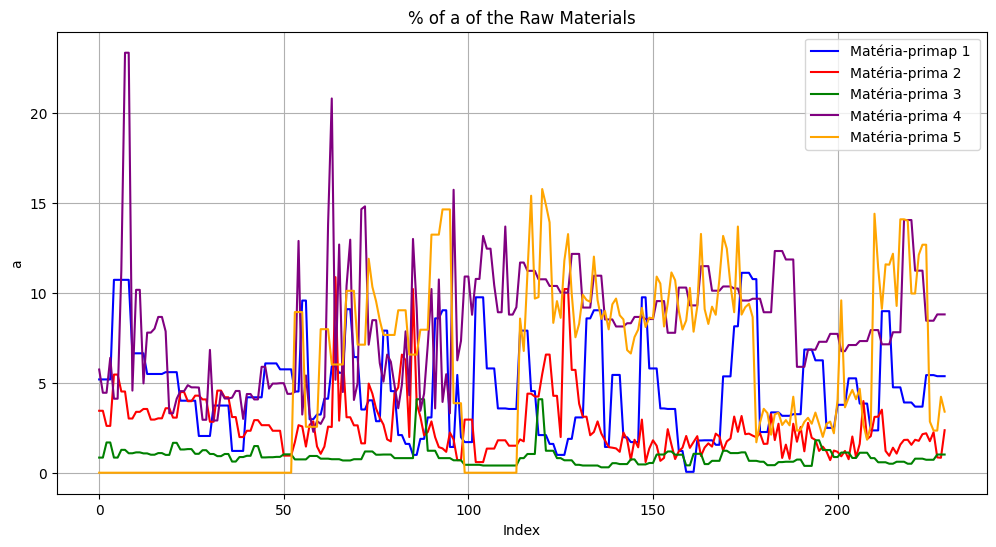

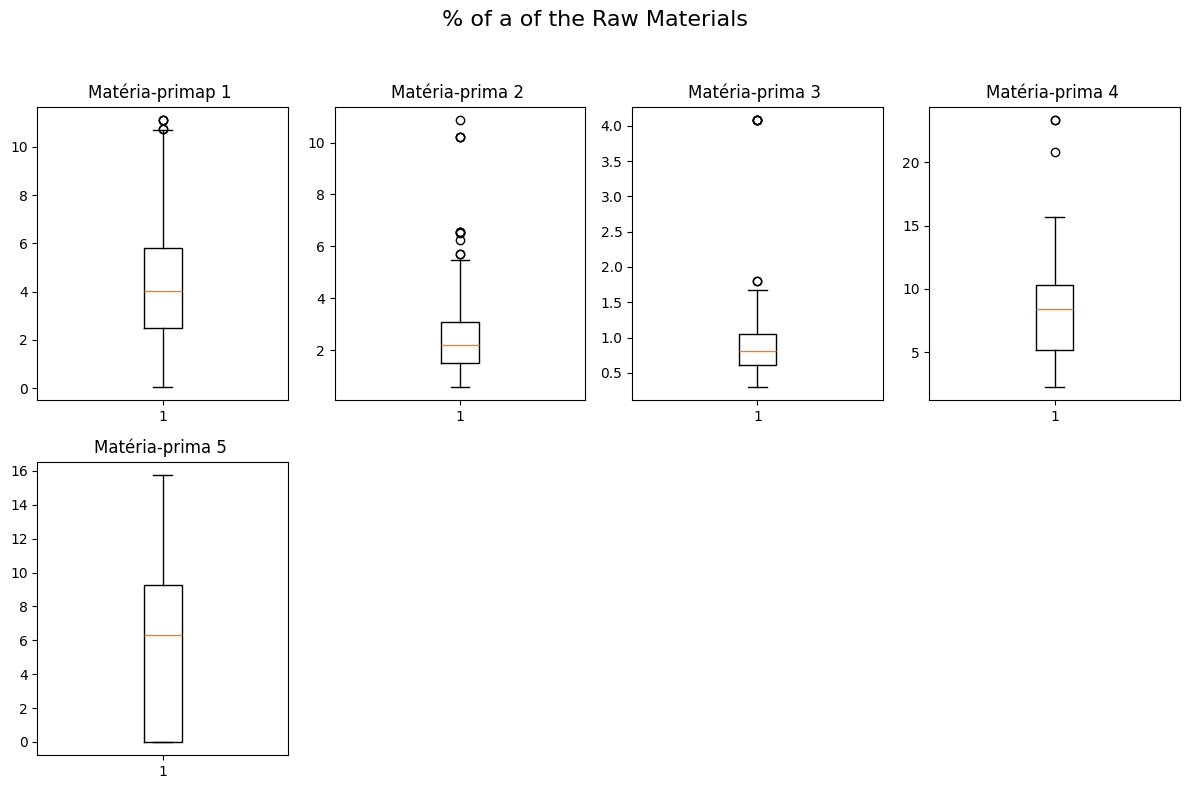

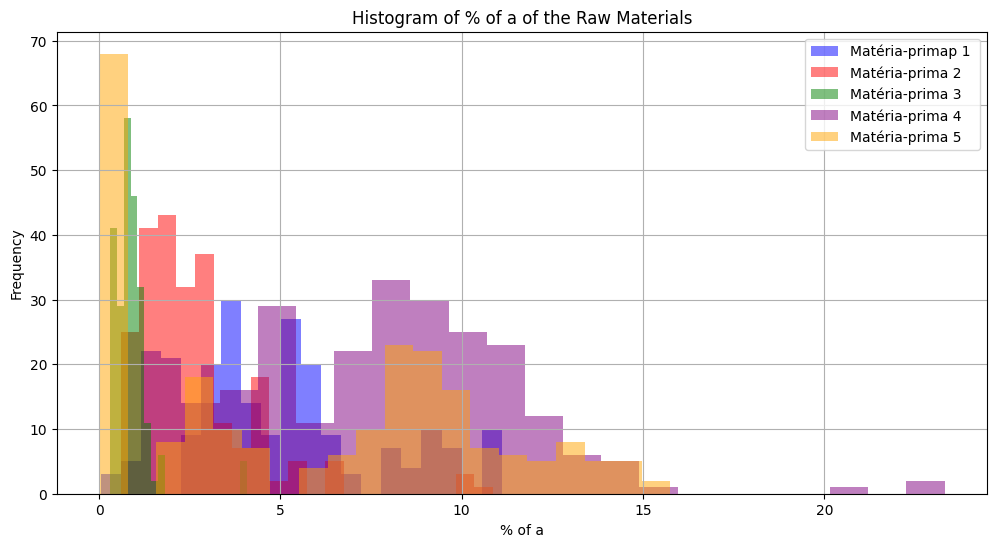


statistics:
         mean       std   min    max  range         cv
a.0  4.642754  2.648610  0.05  11.10  11.05  57.048267
a.1  2.602091  1.651178  0.59  10.86  10.27  63.455831
a.2  0.907051  0.564531  0.30   4.08   3.78  62.238108
a.3  8.229790  3.384071  2.27  23.32  21.05  41.119772
a.4  5.635696  4.754524  0.00  15.75  15.75  84.364460

Number of zero values in each column:
a.0     0
a.1     0
a.2     0
a.3     0
a.4    68
dtype: int64


In [19]:
columns = [
    "a.0",
    "a.1",
    "a.2",
    "a.3",
    "a.4",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

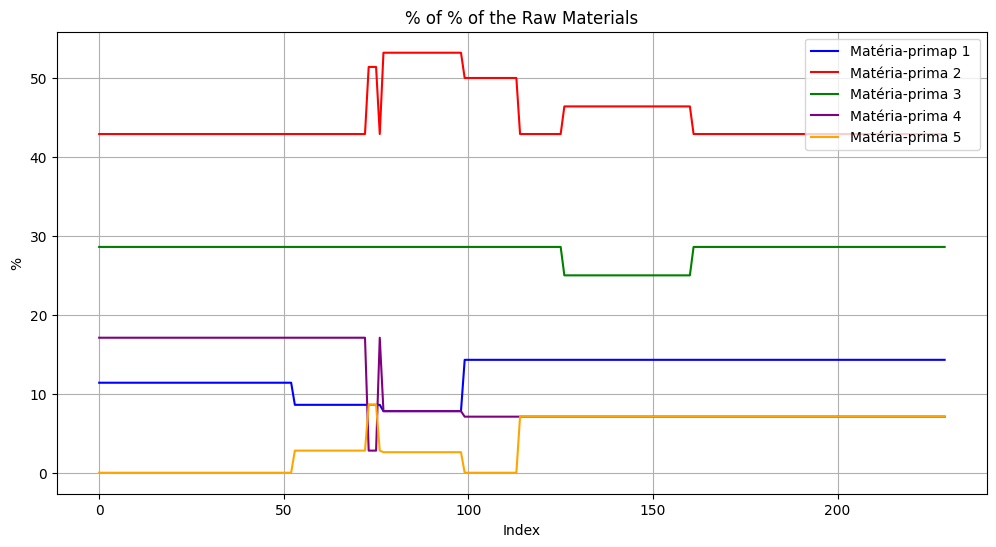

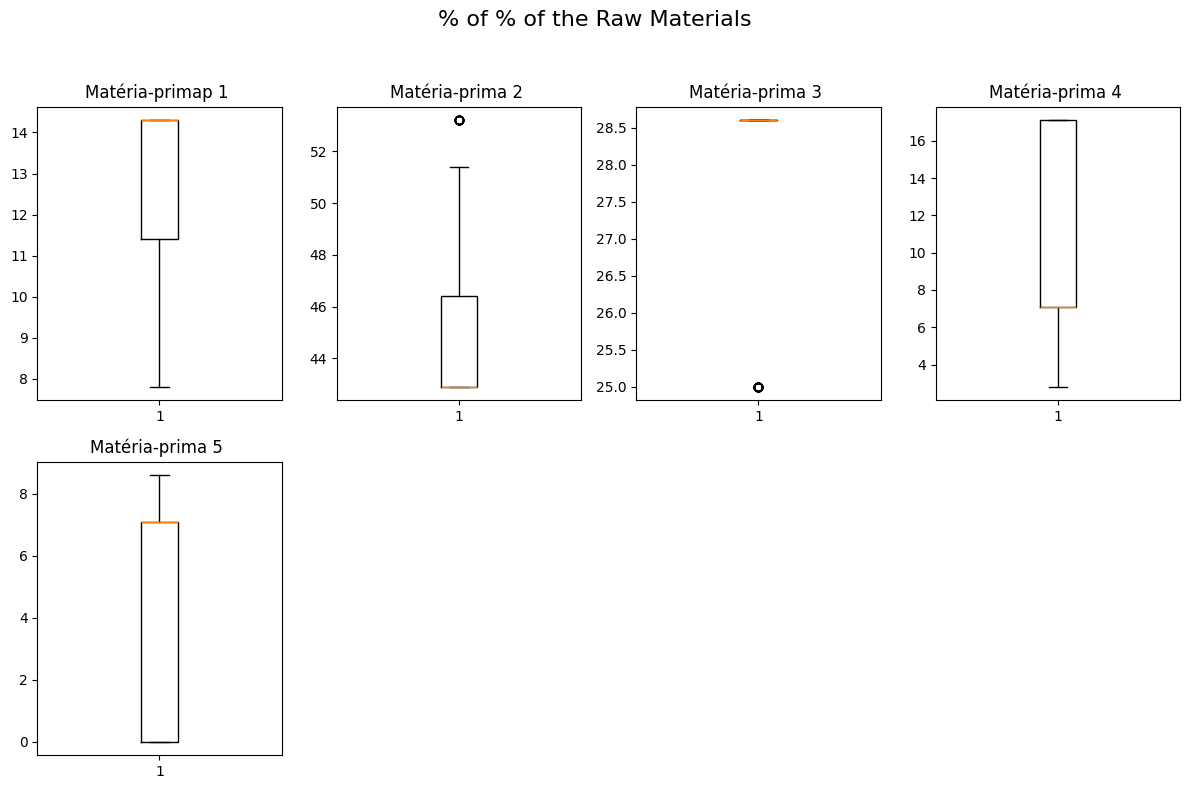

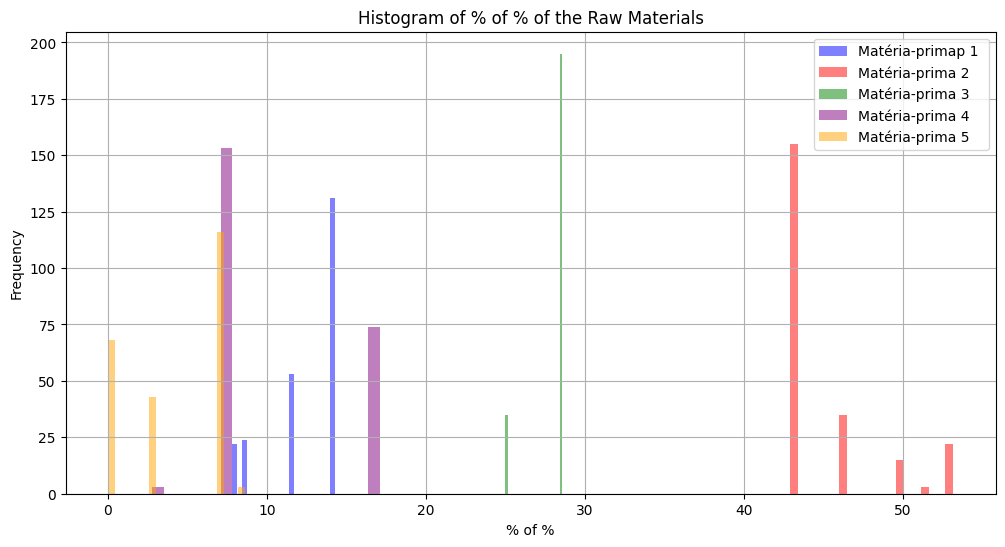


statistics:
          mean       std   min   max  range         cv
%.0  12.415217  2.417130   7.8  14.3    6.5  19.469093
%.1  44.991739  3.452291  42.9  53.2   10.3   7.673167
%.2  28.052174  1.295902  25.0  28.6    3.6   4.619614
%.3  10.328261  4.704948   2.8  17.1   14.3  45.554115
%.4   4.197391  3.190213   0.0   8.6    8.6  76.004666

Number of zero values in each column:
%.0     0
%.1     0
%.2     0
%.3     0
%.4    68
dtype: int64


In [20]:
columns = [
    "%.0",
    "%.1",
    "%.2",
    "%.3",
    "%.4",
]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)
zeros(columns)

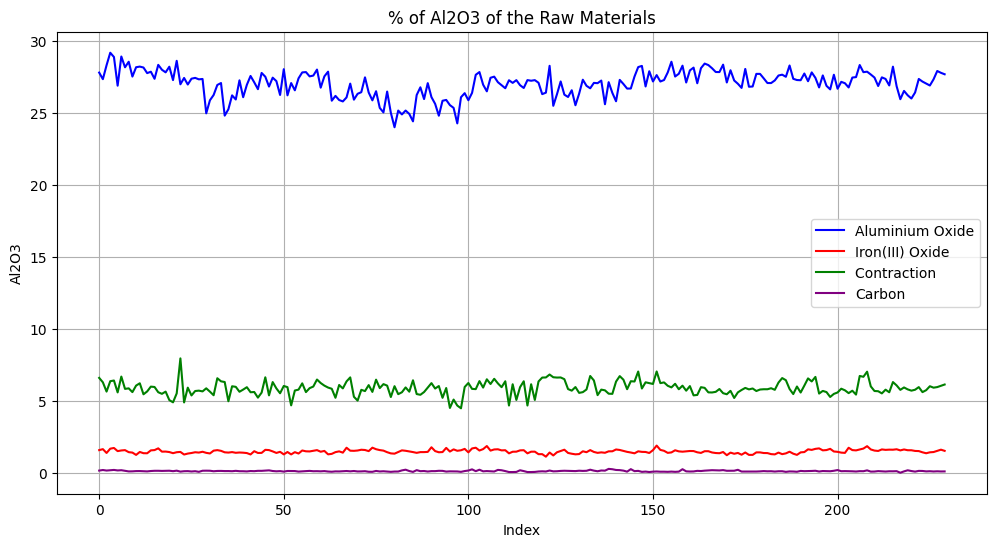

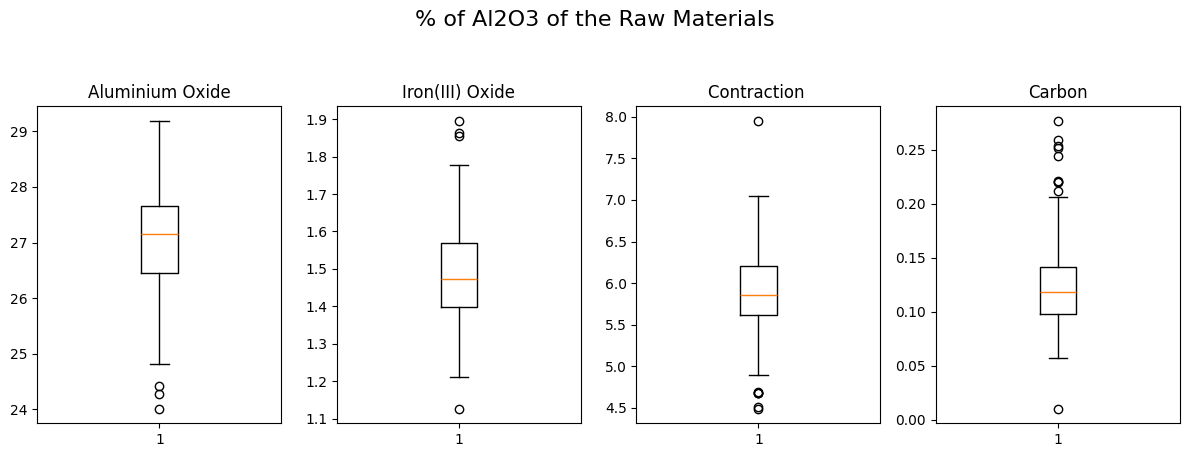

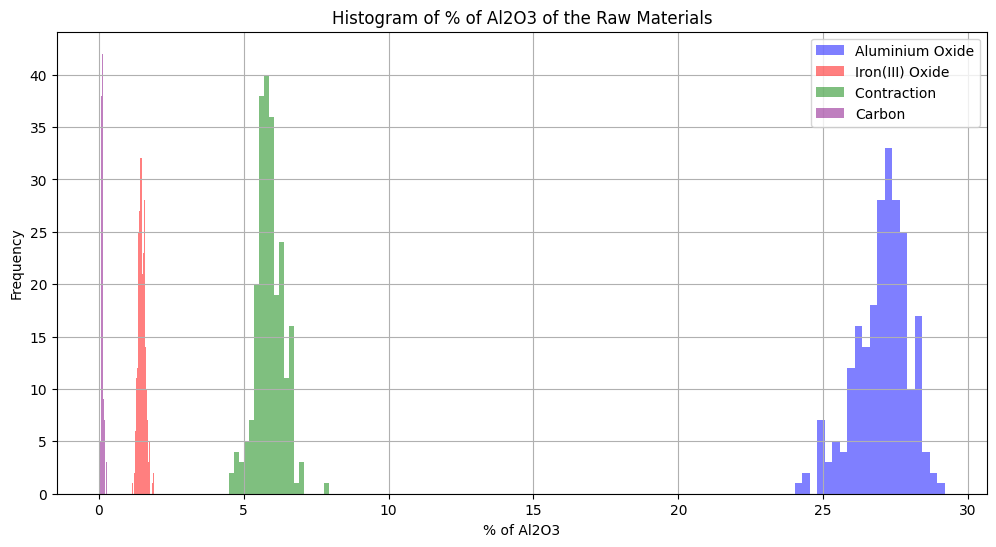


statistics:
                mean       std        min        max     range         cv
Al2O3.5    27.030985  0.921116  24.011236  29.190006  5.178770   3.407629
Fe2O3.5     1.483993  0.126133   1.125854   1.895792  0.769938   8.499584
CS-C.5      5.889014  0.484940   4.486154   7.953755  3.467601   8.234659
Carbono.5   0.124310  0.039589   0.010200   0.277000  0.266800  31.846883


In [21]:
columns = [
    "Al2O3.5",
    "Fe2O3.5",
    "CS-C.5",
    "Carbono.5",
]

legend_labels = ["Aluminium Oxide", "Iron(III) Oxide", "Contraction ", "Carbon"]

plot_graph(columns, colors, legend_labels)
plot_box(columns, legend_labels)
plot_histo(columns, colors, legend_labels)
statistics(columns)

In [22]:
actual_zeros = set()
total_zeros = 0
for i in range(len(data)):
    for j in range(len(mapping)-1):
        for k in range(5):
            if data.iloc[i, j+11*k] == 0 and data.iloc[i, 10+ 11*k] != 0:
                print(f"Row {i} has a zero in {mapping[j]}.{k} but not in %")
                actual_zeros.add((i, j+11*k))

print(f"\nTotal number of actual zeros: {len(actual_zeros)}")

for col in data.columns:
    total_zeros = total_zeros + (data[col] == 0).sum()

print(f"Total number of zeros in the dataset: {total_zeros}") 


Total number of actual zeros: 0
Total number of zeros in the dataset: 748


In [23]:
for col in data.columns:
    if col not in actual_zeros:
        data[col] = data[col].replace(0, 1e-3)

for i, j in actual_zeros:
    data.iloc[i, j] = 0

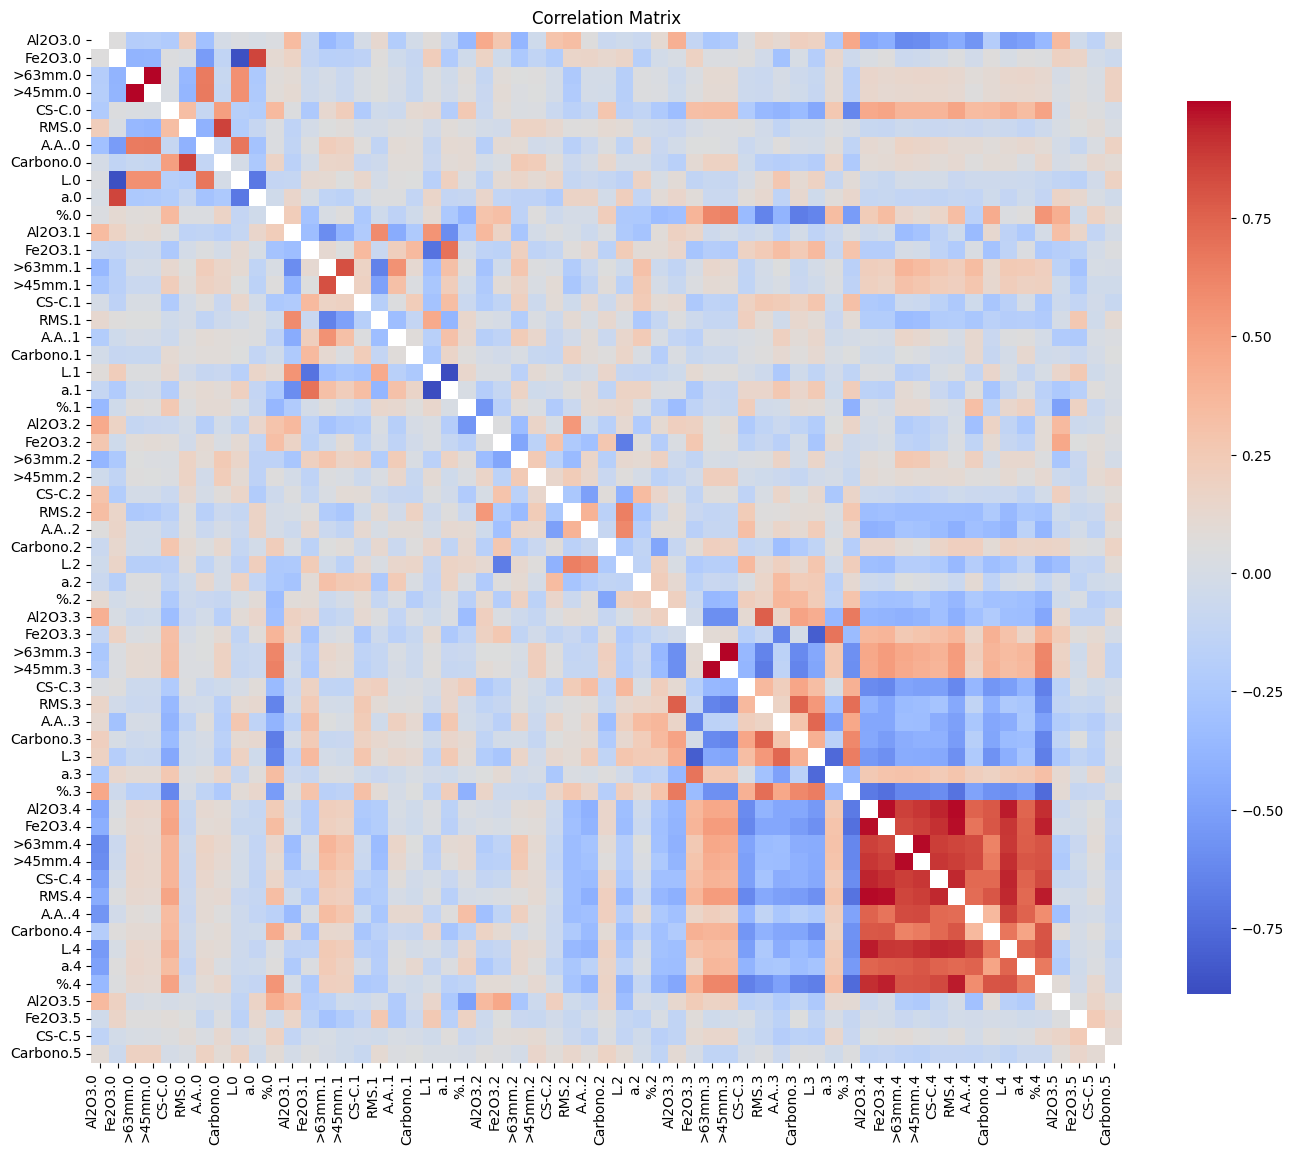

In [24]:
corr_matrix = data.corr()
mask = np.eye(len(corr_matrix), dtype=bool)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()



In [25]:
target_columns = [
    "Al2O3.5",
    "Fe2O3.5",
    "CS-C.5",
    "Carbono.5",
]

datasets = {}
def get_correlated_features(target_columns, threshold, datasets):
    for target in target_columns:
        correlated_features = corr_matrix[target][abs(corr_matrix[target]) > threshold].index.tolist()
        datasets[target] = data[correlated_features].drop(columns=[target])
        print(f"Correlated features for {target}: {correlated_features}")

get_correlated_features(target_columns, 0.1, datasets)

Correlated features for Al2O3.5: ['Al2O3.0', 'Fe2O3.0', 'L.0', 'a.0', '%.0', 'Al2O3.1', 'Fe2O3.1', '>63mm.1', 'A.A..1', 'L.1', 'a.1', '%.1', 'Al2O3.2', 'Fe2O3.2', '>63mm.2', 'CS-C.2', 'Carbono.2', 'L.2', 'Al2O3.3', 'Fe2O3.3', '>63mm.3', '>45mm.3', 'CS-C.3', 'RMS.3', 'A.A..3', 'Carbono.3', 'L.3', 'a.3', '>63mm.4', '>45mm.4', 'A.A..4', 'L.4', 'a.4', 'Al2O3.5', 'CS-C.5']
Correlated features for Fe2O3.5: ['Fe2O3.0', 'L.0', 'a.0', 'Al2O3.1', 'Fe2O3.1', '>63mm.1', '>45mm.1', 'CS-C.1', 'RMS.1', 'A.A..1', 'L.1', 'a.1', '%.1', 'L.2', 'a.2', 'Al2O3.3', 'A.A..3', 'L.3', 'Fe2O3.5', 'CS-C.5', 'Carbono.5']
Correlated features for CS-C.5: ['Al2O3.0', 'Carbono.0', '%.0', 'Al2O3.1', '>45mm.2', 'A.A..2', 'L.2', '%.2', 'Al2O3.3', 'Fe2O3.3', '>63mm.3', '>45mm.3', 'RMS.3', 'A.A..3', 'Carbono.3', 'L.3', 'a.3', '%.4', 'Al2O3.5', 'Fe2O3.5', 'CS-C.5', 'Carbono.5']
Correlated features for Carbono.5: ['>63mm.0', '>45mm.0', 'A.A..0', 'L.0', 'RMS.1', '>45mm.2', 'RMS.2', 'Carbono.2', '%.2', 'Al2O3.3', '>63mm.3', '>